In [1]:
from jarvis.db.figshare import data as jdata
from jarvis.core.graphs import Graph
from jarvis.core.atoms import Atoms
import pandas as pd
from transformers.models.graphormer.collating_graphormer import preprocess_item, GraphormerDataCollator
from data_utils import AtomsToGraphs

# dataset_processed = dataset.map(preprocess_item, batched=False)


/home/yj/anaconda3/envs/llamat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:

import pyarrow.parquet as pq
table = pq.read_table('/mnt/hdd1/SESPapers/paper_type7.parquet')
df = table.to_pandas()

In [54]:
target = 'YBr3'
df['query'] = df['text'].apply(lambda x: target in x and '2D' in x)
df['text'][df['query']].apply(lambda x: [p for p in x.split('\n') if target in p]).to_list()

[['Exploring ultrathin two-dimensional (2D) solid electrolytes with fast ion transport is highly desirable in nanoelectronics, ionic devices and various energy storage systems, following the rapid scaling of devices to the nanometer scale. Herein, two-dimensional (2D) metal trihalides MX3 (ScCl3, ScBr3, AsI3, ScI3, YBr3, SbI3, YI3 and BiI3) with intrinsic atomic pore structures have been examined and found to be promising as realistic 2D solid electrolytes. Through examining the binding interactions and the diffusion barriers of monolayer MX3-ion (Li+, Na+, K+, Mg2+, and Ca2+) systems by utilizing first principles calculations, it is found that MX3-ion complexes are energetically favorable and the energy barriers of some MX3-ion systems are comparable to or even smaller than those of the conventional solid electrolyte systems. More significantly, the short diffusion time of Na+ and K+ ions in some monolayers MX3 at the nanosecond (ns) or even at the sub-ns scale indicates fast ion tran

In [77]:
Atoms.from_dict(data['atoms'][0]).

AttributeError: 'Atoms' object has no attribute 'coordinate'

In [35]:
dbs = ['dft_2d', 'dft_3d', 'mp_3d_2020', 'oqmd_3d', 'aflow2', 'cod', 'twod_matpd', 'ocp10k', 'supercon_chem', 'vacancydb', 'supercon_3d']

Atoms.from_dict(data['atoms'][0])

In [66]:
data = pd.DataFrame(jdata('hmof'))
len(data), data.keys()

Obtaining hMOF dataset 137k...
Reference:https://doi.org/10.1021/acs.jpcc.6b08729
Loading the zipfile...
Loading completed.


(137652,
 Index(['id', 'atoms', 'max_co2_adsp', 'min_co2_adsp', 'lcd', 'pld',
        'void_fraction', 'surface_area_m2g', 'surface_area_m2cm3',
        'co2_pressures', 'co2_absp'],
       dtype='object'))

In [67]:
from ase.visualize import view
view(Atoms.from_dict(data['atoms'][0]).ase_converter())

<Popen: returncode: None args: ['/home/yj/anaconda3/envs/llamat/bin/python',...>

In [68]:
Atoms.from_dict(data['atoms'][10]).spacegroup()

'P1 (1)'

In [69]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

SpacegroupAnalyzer(Atoms.from_dict(data['atoms'][0]).pymatgen_converter()).get_crystal_system()

'triclinic'

In [70]:
data['crystal_system'] = data['atoms'].apply(lambda x: SpacegroupAnalyzer(Atoms.from_dict(x).pymatgen_converter()).get_crystal_system())

spglib: ssm_get_exact_positions failed (attempt=0). (line 115, /project/src/site_symmetry.c).
spglib: ssm_get_exact_positions failed (attempt=1). (line 115, /project/src/site_symmetry.c).
spglib: ssm_get_exact_positions failed (attempt=2). (line 115, /project/src/site_symmetry.c).


In [71]:
data['crystal_system'].value_counts()

crystal_system
triclinic       126933
monoclinic        8826
orthorhombic      1428
trigonal           447
cubic               17
tetragonal           1
Name: count, dtype: int64

In [75]:
len(data['atoms'][1000]['elements'])

133

In [39]:
data

,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,...,poisson,raw_files,nat,bulk_modulus_kv,shear_modulus_gv,mbj_bandgap,hse_gap,reference,search,desc
0,JVASP-14441,164,P-3m1,CoO2,-0.92474,OptB88vdW,0.000,"{'lattice_mat': [[2.8173501021142346, -0.0, 0....",na,0.940,...,na,"[STM,JVASP-14441_Positive.zip,https://ndownloa...",3,na,na,na,na,mp-714976-1L,-Co-O,"[2187.06, 1645.1821, 5.936999999999999, -25.45..."
1,JVASP-76308,31,Pmn2_1,UTe3,-0.48063,OptB88vdW,0.000,"{'lattice_mat': [[4.476735664683434, -0.000140...",na,4.890,...,na,"[OPT-LOPTICS,JVASP-76308.zip,https://ndownload...",8,na,na,na,na,mp-22231-1L,-Te-U,"[4557.7, 2730.6326, 4.755, -166.339455, 0.0, 1..."
2,JVASP-76515,162,P-31m,BiI3,-0.36479,OptB88vdW,2.548,"{'lattice_mat': [[3.7944202607364415, -6.57212...",6.32,0.000,...,na,"[FD-ELAST,JVASP-76515.zip,https://ndownloader....",8,na,na,2.862,na,mp-569157-1L,-Bi-I,"[1789.7800000000002, 1147.29433, 9.66, -144.42..."
3,JVASP-13526,12,C2/m,YBr3,-1.88687,OptB88vdW,4.067,"{'lattice_mat': [[7.091458561131444, 0.0, 0.0]...",na,0.000,...,na,"[DFT-SCF,JVASP-13526.zip,https://ndownloader.f...",8,na,na,na,na,mp-754815-1L,-Br-Y,"[3439.0, 1970.583375, 8.120000000000001, -64.5..."
4,JVASP-27901,164,P-3m1,ScHCl,-1.41350,OptB88vdW,0.000,"{'lattice_mat': [[3.4878362323679837, 3.659734...",na,0.001,...,na,"[FD-ELAST,JVASP-27901.zip,https://ndownloader....",6,na,na,na,na,mp-24081-1L,-Cl-H-Sc,"[1736.3266666666666, 1120.8563333333334, 6.045..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,JVASP-153118,164,P-3m1,NbTe2,-0.31776,OptB88vdW,0.000,"{'lattice_mat': [[3.6823442232907753, -4.36387...",na,0.000,...,na,[],3,na,na,na,na,t-nbte2-optb88-vdw,-Nb-Te,"[4520.025, 3139.2369, 9.059999999999999, -94.6..."
1099,JVASP-153119,164,P-3m1,TaTe2,-0.21262,OptB88vdW,0.000,"{'lattice_mat': [[3.7072128641035267, -0.0, -1...",na,0.000,...,na,[],3,na,na,na,na,t-tate2-optb88-vdw,-Ta-Te,"[5037.674999999999, 3496.2697500000004, 6.305,..."
1100,JVASP-153120,187,P-6m2,B3W2,0.91212,OptB88vdW,0.000,"{'lattice_mat': [[3.554461445441836, 1e-16, 0....",na,0.000,...,na,[],5,na,na,na,na,w2b3-optb88-vdw,-B-W,"[5718.9, 5014.51255, 4.5975, -90.3955, 0.0, 89..."
1101,JVASP-153121,99,P4mm,ZrSiS,-0.76981,OptB88vdW,0.000,"{'lattice_mat': [[3.4634782005795537, 0.0, 0.0...",na,0.000,...,na,[],6,na,na,na,na,zrsis-optb88-vdw,-S-Si-Zr,"[3821.7566666666676, 2857.866436666667, 6.5373..."


In [20]:
from ase.visualize import view
view(Atoms.from_dict(data['atoms'][0]).ase_converter(), viewer='x3d')

In [15]:
data

,id,atoms,relaxed_energy
0,ocp-1,"{'lattice_mat': [[11.832514762878418, 0.0, -0....",-0.025550
1,ocp-2,"{'lattice_mat': [[12.750493049621582, 0.0, 0.0...",-1.837069
2,ocp-3,"{'lattice_mat': [[11.985345840454102, 0.0, 0.0...",-0.152283
3,ocp-4,"{'lattice_mat': [[8.023002624511719, 0.0, -3.6...",-6.227071
4,ocp-5,"{'lattice_mat': [[11.047003746032715, 0.0, 0.0...",-2.453840
...,...,...,...
59881,ocp-59882,"{'lattice_mat': [[15.337007522583008, 0.0, -2....",2.426782
59882,ocp-59883,"{'lattice_mat': [[12.79610824584961, 0.0, 0.88...",1.882087
59883,ocp-59884,"{'lattice_mat': [[13.060641288757324, 0.0, 0.5...",-1.612726
59884,ocp-59885,"{'lattice_mat': [[10.722107887268066, 0.0, 0.0...",1.814543


In [10]:
dft_2d = pd.DataFrame(jdata(dbs[0]))

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705
Loading the zipfile...
Loading completed.


In [12]:
dft_2d['reference']

0               mp-714976-1L
1                mp-22231-1L
2               mp-569157-1L
3               mp-754815-1L
4                mp-24081-1L
                ...         
1098      t-nbte2-optb88-vdw
1099      t-tate2-optb88-vdw
1100         w2b3-optb88-vdw
1101        zrsis-optb88-vdw
1102    w2n3-optb88-vdw-copy
Name: reference, Length: 1103, dtype: object

In [9]:
data

,atoms,source_id,exfoliation_energy_per_atom,energy_per_atom,total_magnetization,thermo,bandgap,material_id
0,"{'lattice_mat': [[3.51927914, -4e-08, 0.0], [-...",mp-30033,0.234617,-4.536822,2.487400e-01,"{'energy_vdw': -10.08505654, 'energy_vdw_per_a...",0.0000,2dm-1
1,"{'lattice_mat': [[4.953362, 0.0, 0.0], [-2.476...",mp-1245,0.210645,-3.243794,7.488541e-01,"{'energy_vdw': -6.56098752, 'energy_vdw_per_at...",0.0000,2dm-2
2,"{'lattice_mat': [[3.97857507, 0.00151911, 0.49...",mp-542812,0.095794,-3.325673,-0.000000e+00,"{'energy_vdw': -26.77720289, 'energy_vdw_per_a...",0.9814,2dm-3
3,"{'lattice_mat': [[3.166735, 0.0, 0.0], [0.0, 5...",mp-554340,-0.055818,-5.294281,0.000000e+00,"{'energy_vdw': -26.81824534, 'energy_vdw_per_a...",0.0000,2dm-4
4,"{'lattice_mat': [[3.155589, 0.0, 0.0], [-1.577...",mvc-12841,na,-6.799664,8.870660e-02,"{'energy_vdw': -17.50786697, 'energy_vdw_per_a...",0.0000,2dm-6367
...,...,...,...,...,...,...,...,...
6346,"{'lattice_mat': [[8.29049051, 0.0, 0.0], [0.0,...",mp-1078607,na,na,1.429800e-02,"{'energy_vdw': -18.44380272, 'energy_vdw_per_a...",0.1990,2dm-6366
6347,"{'lattice_mat': [[3.51926099, 0.0, 0.0], [-1.7...",mp-10264,0.113072,-5.11598,1.500000e-05,"{'energy_vdw': -16.98172472, 'energy_vdw_per_a...",0.0000,2dm-84
6348,"{'lattice_mat': [[3.68430329, 0.0, 0.0], [-1.8...",mp-10264,0.125031,-4.83919,2.000000e-07,"{'energy_vdw': -15.42759019, 'energy_vdw_per_a...",0.0000,2dm-152
6349,"{'lattice_mat': [[3.64018482, -5e-08, 0.0], [-...",mp-11693,0.108621,-5.322218,2.050000e-05,"{'energy_vdw': -17.83658166, 'energy_vdw_per_a...",0.0000,2dm-6459


In [23]:
from mp_api.client import MPRester
with MPRester("P8EBJnlyztrnazFXOwje9Ir3JNk5gkjO") as mpr:
    docs = mpr.summary.search(material_ids=["mp-22231"])

/tmp/ipykernel_3850172/3428671987.py:3: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=["mp-22231"])
Retrieving SummaryDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9258.95it/s]


In [32]:
docs[0],

(MPDataDoc<SummaryDoc>(
 builder_meta=EmmetMeta(emmet_version='0.38.6', pymatgen_version='2022.10.22', pull_request=825, database_version='2022.10.28', build_date=datetime.datetime(2022, 10, 28, 0, 55, 28, 436000)),
 nsites=8,
 elements=[Element Te, Element U],
 nelements=2,
 composition=Composition('U2 Te6'),
 composition_reduced=Composition('U1 Te3'),
 formula_pretty='UTe3',
 formula_anonymous='AB3',
 chemsys='Te-U',
 volume=252.30843950559242,
 density=8.171828582110074,
 density_atomic=31.538554938199052,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.ortho: 'Orthorhombic'>, symbol='Cmcm', number=63, point_group='mmm', symprec=0.1, version='1.16.2'),
 property_name='summary',
 material_id=MPID(mp-22231),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2022, 10, 28, 0, 55, 28, 436000),
 origins=[],
 warnings=[],
 structure=Structure Summary
 Lattice
     abc : 13.140113262996628 13.140113262996628 4.45946902
  angles : 90.0 90.0 160.87195702941779

In [ ]:
from ase.visualize import view
view(Atoms.from_dict(data['atoms'][1101]).ase_converter(), viewer='x3d')

In [72]:
a2g = AtomsToGraphs(
    max_neigh=12,
    radius=100,
    r_distances=True,
    r_edges=True,
    r_pbc=True,
)
a2g.convert(Atoms.from_dict(data.iloc[4]['atoms']).ase_converter().pbc)
# Generate graph

Data(pos=[3, 3], cell=[1, 3, 3], atomic_numbers=[3], natoms=3, tags=[3], edge_index=[2, 34], cell_offsets=[34, 3], distances=[34], fixed=[3], pbc=[3])

In [74]:
test = Atoms.from_dict(data.iloc[4]['atoms']).ase_converter()
test.pbc

array([ True,  True,  True])

In [75]:
data.iloc[4]['atoms']

{'lattice_mat': [[1.6777483798834445, -2.9059452409270157, -1.1e-15],
  [1.6777483798834438, 2.9059452409270126, -7e-16],
  [-6.5e-15, -8e-16, 6.220805465667012]],
 'coords': [[0.0, 0.0, 0.0],
  [1.67775, -0.9686519372999812, 4.6529213966213625],
  [1.67775, 0.9686519372999813, 1.5678886033786343]],
 'elements': ['V', 'Se', 'Se'],
 'abc': [3.355502, 3.355502, 6.22081],
 'angles': [90.0, 90.0, 120.0],
 'cartesian': True,
 'props': ['', '', '']}

In [71]:
Graph.atom_dgl_multigraph(Atoms.from_dict(data.iloc[4]['atoms']), compute_line_graph=False)

Graph(num_nodes=3, num_edges=72,
      ndata_schemes={'atom_features': Scheme(shape=(92,), dtype=torch.float32)}
      edata_schemes={'r': Scheme(shape=(3,), dtype=torch.float32)})

In [58]:
def generate_graph_text(atoms):
    # Generate graph
    dglgraph = Graph.atom_dgl_multigraph(Atoms.from_dict(atoms), compute_line_graph=False)
    item = {}
    edges = dglgraph.edges()
    item['edge_index'] = [edges[0].tolist(), edges[1].tolist()]
    item['num_nodes'] = dglgraph.num_nodes()
    item['node_feat'] = dglgraph.ndata['atom_features'].tolist()
    item['edge_attr'] = dglgraph.edata['r'].tolist()
    
    # Generate text
    item['y'] = 'A <dimensionality> <crystalsystme> <formula>, with intercalated ions'
    return item

In [70]:
generate_graph_text(data.iloc[4]['atoms'])['edge_index']

[[0,
  1,
  0,
  1,
  0,
  1,
  0,
  2,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  2,
  2,
  0,
  2,
  0,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  1],
 [1,
  0,
  1,
  0,
  1,
  0,
  2,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  2,
  1,
  0,
  2,
  0,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  1,
  2]]

In [76]:
from ase.visualize import view

ase_atom = Atoms.from_dict(data.iloc[4]['atoms']).ase_converter()
view(ase_atom)

<Popen: returncode: None args: ['/home/yj/anaconda3/envs/llamat/bin/python',...>

In [53]:
data['dimensionality'].value_counts()

dimensionality
3D-bulk                  36101
intercalated ion         31682
2D-bulk                   4427
0D-bulk                   1817
1D-bulk                   1320
na                         433
intercalated molecule      213
Name: count, dtype: int64

In [56]:
data[data['dimensionality'] == '2D-bulk']

,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,spillage,elastic_tensor,effective_masses_300K,kpoint_length_unit,maxdiff_mesh,maxdiff_bz,encut,optb88vdw_total_energy,epsx,epsy,epsz,mepsx,mepsy,mepsz,modes,magmom_outcar,max_efg,avg_elec_mass,avg_hole_mass,icsd,dfpt_piezo_max_eij,dfpt_piezo_max_dij,dfpt_piezo_max_dielectric,dfpt_piezo_max_dielectric_electronic,dfpt_piezo_max_dielectric_ionic,max_ir_mode,min_ir_mode,n-Seebeck,p-Seebeck,n-powerfact,p-powerfact,ncond,pcond,nkappa,pkappa,ehull,Tc_supercon,dimensionality,efg,xml_data_link,typ,exfoliation_energy,spg,crys,density,poisson,raw_files,nat,bulk_modulus_kv,shear_modulus_gv,mbj_bandgap,hse_gap,reference,search
4,JVASP-10,164,P-3m1,VSe2,-0.71026,OptB88vdW,0.000,"{'lattice_mat': [[1.6777483798834445, -2.90594...",na,0.0,na,"[[136.4, 27.8, 17.5, 0.0, -5.5, 0.0], [27.8, 1...","{'p': [0.0, 0.0, 0.0], 'n': [0.0, 0.0, 0.0]}",40,na,na,500,-3.87823,47.029,47.029,28.1625,79.071,78.7247,18.006,"[-0.22, -0.1, -0.1, 142.22, 142.22, 192.04, 19...",0.0,89.678,0.0,0.0,"86520,652160,652163,652158",0.0,0.0,54.202007,44.924312,9.277695,342.84,204.14,18.273333,17.486667,657.17,614.083333,2033190.976667,2045950.983333,2798132623333333.0,2811808060000000.0,0.0156,na,2D-bulk,"[[V, a, 22.568, 0.0, 0.0, 0.0, 22.559, 0.0, 0....",<a href=https://www.ctcms.nist.gov/~knc6/stati...,bulk,83.78,164,trigonal,5.718,0.23,"[FD-ELAST,JVASP-10.zip,https://ndownloader.fig...",3,48.79,33.05,0.0,na,mp-694,-Se-V
9,JVASP-28634,156,P3m1,MoW3Se2S6,-0.79449,OptB88vdW,0.689,"{'lattice_mat': [[3.2250494729190726, 2.216578...",na,na,na,na,"{'p': 'na', 'n': 'na'}",30,na,na,700,-5.50471,11.7026,11.7027,7.1954,na,na,na,na,na,na,na,na,,0.08716,na,11.302122,11.216465,0.896348,0.04,0.0,na,na,na,na,na,na,na,na,0.1568,na,2D-bulk,[],<a href=https://www.ctcms.nist.gov/~knc6/stati...,bulk,na,156,trigonal,5.388,na,"[DFPT,JVASP-28634.zip,https://ndownloader.figs...",12,na,na,na,na,mp-1027115,-Mo-S-Se-W
19,JVASP-28704,156,P3m1,Mo3WSe6S2,-0.68238,OptB88vdW,0.502,"{'lattice_mat': [[3.292134155794691, 0.0, 0.0]...",na,na,na,na,"{'p': 'na', 'n': 'na'}",30,na,na,700,-4.84668,12.7731,12.7731,7.8601,na,na,na,na,na,na,na,na,,0.01533,na,12.591796,12.334702,0.257094,0.05,0.0,na,na,na,na,na,na,na,na,0.0824,na,2D-bulk,[],<a href=https://www.ctcms.nist.gov/~knc6/stati...,bulk,na,156,trigonal,5.106,na,"[DFPT,JVASP-28704.zip,https://ndownloader.figs...",12,na,na,na,na,mp-1027404,-Mo-S-Se-W
20,JVASP-60702,61,Pbca,PdSe8Cl2,-0.15071,OptB88vdW,1.197,"{'lattice_mat': [[9.067075684180468, -0.0, 0.0...",32.6,0.0,na,na,"{'p': [2.47, 2.11, 2.75], 'n': [1.96, 2.94, 0.6]}",35,na,na,900,-1.72261,na,na,na,na,na,na,na,0.0,na,1.833333,2.443333,418159,0.0,na,11.096555,8.715231,2.90767,0.22,0.0,-226.623333,307.193333,624.706667,512.62,12529.073333,5415.06,43980392333333.335938,33551649333333.332031,0.0016,na,2D-bulk,[],<a href=https://www.ctcms.nist.gov/~knc6/stati...,bulk,88.81,61,orthorhombic,4.471,na,"[DFPT,JVASP-60702.zip,https://ndownloader.figs...",44,na,na,na,na,mp-567437,-Cl-Pd-Se
22,JVASP-28565,156,P3m1,Te2Mo2WSe2S2,-0.49933,OptB88vdW,0.051,"{'lattice_mat': [[3.3542337275744103, 0.0, 0.0...",na,na,na,na,"{'p': 'na', 'n': 'na'}",35,na,na,650,-4.61299,13.2233,13.2234,7.7759,na,na,na,na,na,170.883,na,na,,0.10301,na,13.51304,12.873534,0.642416,0.34,0.0,na,na,na,na,na,na,na,na,0.1529,na,2D-bulk,"[[Te, a, 85.438, 0.0, -0.0, 0.0, 85.445, 0.027...",<a href=https://www.ctcms.nist.gov/~knc6/stati...,bulk,na,156,trigonal,4.974,na,"[DFPT,JVASP-28565.zip,https://ndownloader.figs...",9,na,na,na,na,mp-1026016,-Mo-S-Se-Te-W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75453,JVASP-146909,166,R-3m,CrCo3O8,-1.22303,OptB88vdW,0.000,"{'lattice_mat': [[4.748237174000914, -0.126018...",na,0.898,na,na,"{'p': 'na'

In [28]:
dglgraph

Graph(num_nodes=8, num_edges=192,
      ndata_schemes={'atom_features': Scheme(shape=(92,), dtype=torch.float32)}
      edata_schemes={'r': Scheme(shape=(3,), dtype=torch.float32)})

In [39]:
item = {}
edges = dglgraph.edges()
item['edge_index'] = [edges[0].tolist(), edges[1].tolist()]
item['num_nodes'] = dglgraph.num_nodes()
item['node_feat'] = dglgraph.ndata['atom_features'].tolist()
item['edge_attr'] = dglgraph.edata['r'].tolist()
item['y'] = 'tewatfawef'

In [40]:
preprocess_item(item)

{'edge_index': [[0,
   7,
   0,
   7,
   0,
   7,
   0,
   7,
   0,
   4,
   0,
   4,
   0,
   5,
   0,
   5,
   0,
   2,
   0,
   2,
   0,
   3,
   0,
   3,
   1,
   6,
   1,
   6,
   1,
   6,
   1,
   6,
   1,
   4,
   1,
   4,
   1,
   5,
   1,
   5,
   1,
   2,
   1,
   2,
   1,
   3,
   1,
   3,
   2,
   3,
   2,
   3,
   2,
   3,
   2,
   3,
   2,
   6,
   2,
   6,
   2,
   7,
   2,
   7,
   2,
   0,
   2,
   0,
   2,
   1,
   2,
   1,
   3,
   2,
   3,
   2,
   3,
   2,
   3,
   2,
   3,
   6,
   3,
   6,
   3,
   7,
   3,
   7,
   3,
   0,
   3,
   0,
   3,
   1,
   3,
   1,
   4,
   5,
   4,
   5,
   4,
   5,
   4,
   5,
   4,
   0,
   4,
   0,
   4,
   1,
   4,
   1,
   4,
   7,
   4,
   7,
   4,
   6,
   4,
   6,
   5,
   4,
   5,
   4,
   5,
   4,
   5,
   4,
   5,
   0,
   5,
   0,
   5,
   1,
   5,
   1,
   5,
   7,
   5,
   7,
   5,
   6,
   5,
   6,
   6,
   2,
   6,
   2,
   6,
   3,
   6,
   3,
   6,
   1,
   6,
   1,
   6,
   1,
   6,
   1,
   6,
   4,
   6,
   4,
  

In [18]:
num_nodes = dglgraph.num_nodes()
num_nodes

8

In [30]:
node_feat = dglgraph.ndata['atom_features']
node_feat.tolist()

In [26]:
edge_feat = dglgraph.edata['r']
edge_feat.tolist()

[[1.783465027809143, -1.783465027809143, -0.8685013055801392],
 [-1.783465027809143, 1.783465027809143, 0.8685013055801392],
 [-1.783465027809143, -1.783465027809143, -0.8685013055801392],
 [1.783465027809143, 1.783465027809143, 0.8685013055801392],
 [1.783465027809143, 1.783465027809143, -0.8685013055801392],
 [-1.783465027809143, -1.783465027809143, 0.8685013055801392],
 [-1.783465027809143, 1.783465027809143, -0.8685013055801392],
 [1.783465027809143, -1.783465027809143, 0.8685013055801392],
 [1.783465027809143, 0.0, 2.0209782123565674],
 [-1.783465027809143, -0.0, -2.0209782123565674],
 [-1.783465027809143, 0.0, 2.0209782123565674],
 [1.783465027809143, -0.0, -2.0209782123565674],
 [0.0, -1.783465027809143, 2.0209782123565674],
 [-0.0, 1.783465027809143, -2.0209782123565674],
 [0.0, 1.783465027809143, 2.0209782123565674],
 [-0.0, -1.783465027809143, -2.0209782123565674],
 [1.783465027809143, 0.0, -2.6775617599487305],
 [-1.783465027809143, -0.0, 2.6775617599487305],
 [-1.7834650278

In [55]:
from jarvis.db.figshare import data as jdata
import pandas as pd         
data = pd.DataFrame(jdata('dft_3d_2021'))
data

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,...,density,poisson,raw_files,nat,bulk_modulus_kv,shear_modulus_gv,mbj_bandgap,hse_gap,reference,search
0,JVASP-90856,129,P4/nmm,TiCuSiAs,-0.42762,OptB88vdW,0.000,"{'lattice_mat': [[3.566933224304235, 0.0, -0.0...",na,0.0,...,5.956,na,[],8,na,na,na,na,mp-1080455,-As-Cu-Si-Ti
1,JVASP-86097,221,Pm-3m,DyB6,-0.41596,OptB88vdW,0.000,"{'lattice_mat': [[4.089078911208881, 0.0, 0.0]...",na,0.0,...,5.522,na,"[OPT-LOPTICS,JVASP-86097.zip,https://ndownload...",7,na,na,na,na,mp-568319,-B-Dy
2,JVASP-64906,119,I-4m2,Be2OsRu,0.04847,OptB88vdW,0.000,"{'lattice_mat': [[-1.833590720595598, 1.833590...",na,0.0,...,10.960,na,"[OPT-LOPTICS,JVASP-64906.zip,https://ndownload...",4,na,na,na,na,auid-3eaf68dd483bf4f4,-Be-Os-Ru
3,JVASP-98225,14,P2_1/c,KBi,-0.44140,OptB88vdW,0.472,"{'lattice_mat': [[7.2963518353359165, 0.0, 0.0...",na,0.0,...,5.145,na,[],32,na,na,na,na,mp-31104,-Bi-K
4,JVASP-10,164,P-3m1,VSe2,-0.71026,OptB88vdW,0.000,"{'lattice_mat': [[1.6777483798834445, -2.90594...",na,0.0,...,5.718,0.23,"[FD-ELAST,JVASP-10.zip,https://ndownloader.fig...",3,48.79,33.05,0.0,na,mp-694,-Se-V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55718,JVASP-123206,164,P-3m1,HeEr3,0.37366,OptB88vdW,0.000,"{'lattice_mat': [[3.430088850824678, 1.7386541...",na,0.0,...,6.451,na,[],4,na,na,na,na,JVASP-102277,-Er-He
55719,JVASP-122142,191,P6/mmm,ZrMn6Ga2Sn4,-0.01992,OptB88vdW,0.000,"{'lattice_mat': [[5.2820419621666534, -3.15118...",na,na,...,7.933,na,[],13,na,na,na,na,mp-1215332,-Ga-Mn-Sn-Zr
55720,JVASP-123207,164,P-3m1,Er3Hf,0.07529,OptB88vdW,0.000,"{'lattice_mat': [[3.3925352656525147, 2.202105...",na,0.0,...,10.357,na,[],4,na,na,na,na,JVASP-102277,-Er-Hf
55721,JVASP-121802,2,P-1,SbPbF7,-2.45757,OptB88vdW,3.652,"{'lattice_mat': [[4.628095666847773, -0.007449...",na,0.0,...,6.077,na,[],18,na,na,na,na,mp-1105453,-F-Pb-Sb


In [56]:
data.keys()
data_labels = data[['optb88vdw_bandgap', 'optb88vdw_total_energy']]

In [57]:
data = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/dft_3d_2021_data.parquet')
# merge data and data_labels
data = pd.concat([data, data_labels], axis=1)
data

,edge_index,num_nodes,node_feat,edge_attr,atoms,y,optb88vdw_bandgap,optb88vdw_total_energy
0,"[[0, 7, 0, 7, 0, 7, 0, 7, 0, 4, 0, 4, 0, 5, 0,...",8,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[1.783465027809143, -1.783465027809143, -0.86...","{'abc': [3.56693, 3.56693, 9.39708], 'angles':...",A POSCAR of the tetragonal TiCuSiAs. \nThe uni...,0.000,-3.37474
1,"[[0, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0, 4, 0, 6, 0,...",7,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-2.0445399284362793, -0.8121488690376282, -2...","{'abc': [4.08908, 4.08908, 4.08908], 'angles':...",A POSCAR of the cubic DyB6. \nThe unit cell co...,0.000,-5.79186
2,"[[0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0,...",4,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, -1.833590030670166, -1.7424850463867188...","{'abc': [4.34386, 4.34386, 4.34386], 'angles':...",A POSCAR of the tetragonal Be2OsRu. \nThe unit...,0.000,-4.65924
3,"[[0, 17, 0, 20, 0, 20, 0, 16, 0, 25, 0, 29, 0,...",32,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-1.9836437702178955, 1.472786784172058, 2.62...","{'abc': [7.29635, 13.439606, 14.224693], 'angl...",A POSCAR of the monoclinic KBi. \nThe unit cel...,0.472,-0.42496
4,"[[0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0,...",3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[1.6777499914169312, -0.9686519503593445, -1....","{'abc': [3.355502, 3.355502, 6.22081], 'angles...",A POSCAR of the trigonal VSe2. \nThe unit cell...,0.000,-3.87823
...,...,...,...,...,...,...,...,...
55718,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,...",4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.7150499820709229, 2.9705400466918945, 0.0]...","{'abc': [3.43009, 3.430083, 12.77694], 'angles...",A POSCAR of the trigonal HeEr3. \nThe unit cel...,0.000,-0.83133
55719,"[[0, 7, 0, 8, 0, 12, 0, 12, 0, 12, 0, 11, 0, 1...",13,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 2.7296316623687744], [-0.0, -0.0, ...","{'abc': [5.28204, 5.282039, 8.96792], 'angles'...",A POSCAR of the hexagonal ZrMn6Ga2Sn4. \nThe u...,0.000,-3.14550
55720,"[[0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-1.2159209626845264e-14, -1.9586800336837769...","{'abc': [3.39254, 3.392535, 10.94291], 'angles...",A POSCAR of the trigonal Er3Hf. \nThe unit cel...,0.000,-3.11208
55721,"[[0, 10, 0, 13, 0, 13, 0, 7, 0, 7, 0, 9, 0, 5,...",18,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.7383081912994385, -1.6879888772964478, -0....","{'abc': [4.732145, 7.450943, 7.659305], 'angle...",A POSCAR of the triclinic SbPbF7. \nThe unit c...,3.652,-2.57911


In [58]:
data = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/dft_3d_2021_data.parquet')
# merge data and data_labels
data = pd.concat([data, data_labels], axis=1)
data
# split train, val, test
import random
random.seed(42)
train_index = random.sample(list(set(data.index)), int(len(data) * 0.8))
val_index = random.sample(list(set(data.index) - set(train_index)), int(len(data) * 0.1))
test_index = list(set(data.index) - set(train_index) - set(val_index))
print(val_index)
data['split'] = 'train'
data['split'][val_index] = 'val'
data['split'][test_index] = 'test'
print(data['split'].value_counts())

train_data = data[data['split'] == 'train']
val_data = data[data['split'] == 'val']
test_data = data[data['split'] == 'test']

train_data.to_parquet('/home/yj/PycharmProjects/MIT/CLaMP/dft_3d_2021_data_train.parquet')
val_data.to_parquet('/home/yj/PycharmProjects/MIT/CLaMP/dft_3d_2021_data_val.parquet')
test_data.to_parquet('/home/yj/PycharmProjects/MIT/CLaMP/dft_3d_2021_data_test.parquet')


[24343, 24716, 40555, 24651, 37788, 11757, 6919, 49765, 46149, 6322, 33033, 37779, 39420, 33991, 37282, 51321, 12507, 1742, 39027, 2131, 27935, 53566, 30040, 45304, 12741, 17936, 27849, 53461, 53901, 54180, 48858, 49417, 15059, 28348, 12295, 55088, 35873, 22284, 6070, 19081, 7654, 26241, 37948, 10179, 31348, 48648, 51602, 31790, 46363, 26800, 37015, 49913, 12941, 11259, 29490, 24309, 37913, 45742, 7854, 6168, 4727, 22970, 30712, 1019, 3956, 36860, 7829, 35323, 21287, 45799, 5672, 41651, 37034, 47643, 16626, 54746, 7003, 42476, 44725, 7509, 55075, 43072, 514, 5216, 38853, 43125, 49043, 39899, 16184, 52349, 36202, 28750, 42763, 6496, 33193, 38517, 45733, 42929, 10416, 6521, 9961, 22077, 17414, 18183, 1601, 51228, 52258, 48620, 33952, 45652, 38339, 27924, 40886, 30475, 29073, 31282, 31240, 25451, 54793, 53066, 29536, 50314, 49071, 19310, 45296, 2133, 22144, 20545, 52806, 5546, 3133, 34378, 18482, 30357, 46836, 7343, 12042, 32172, 822, 42706, 41683, 1430, 48056, 35834, 33536, 26108, 20290,

/tmp/ipykernel_710913/3960408256.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['split'][val_index] = 'val'
/tmp/ipykernel_710913/3960408256.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['split'][test_index] = 'test'


In [40]:
# data = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt_test.parquet')
data = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/snumat_data.parquet')

data

,ICSD_number,Band_gap_HSE,Band_gap_GGA,Band_gap_GGA_optical,Direct_or_indirect,SOC,Space_group_rlx,Magnetic_ordering,Direct_or_indirect_HSE,SNUMAT_id,Band_gap_HSE_optical,Structure_rlx,atoms,edge_index,num_nodes,node_feat,edge_attr,y
0,407646,3.294992,2.037844,2.266085,Indirect,False,81,NM,Direct,SM-1888,3.294992,"cif to poscar 'Ag', 'F', 'C'] \n 1...","{'abc': [7.52053, 7.52053, 10.57683], 'angles'...","[[0, 25, 0, 26, 0, 21, 0, 22, 0, 30, 0, 29, 0,...",40,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.40330323576927185, -2.15987491607666, -1.0...",A POSCAR of the tetragonal Ag5CF4. \nThe unit ...
1,155159,2.143879,0.000000,0.000000,Null,False,62,FM,Direct,SM-13307,2.143879,Primitive Cell \n 1...,"{'abc': [7.35555, 7.35827, 10.62848], 'angles'...","[[0, 13, 0, 21, 0, 27, 0, 20, 0, 26, 0, 30, 0,...",36,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.5289955139160156, 3.041654348373413],...",A POSCAR of the orthorhombic CsAlAgF6. \nThe u...
2,300020,2.884742,1.539445,4.095510,Indirect,False,1,FM,Indirect,SM-2980,5.348794,"cif to poscar ['Ag', 'Al', 'O'] \n 1...","{'abc': [2.88734, 2.88734, 12.25468], 'angles'...","[[0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[5.039811730966903e-05, 1.2070348930137698e-0...",A POSCAR of the hexagonal AlAgO2. \nThe unit c...
3,99688,2.390096,0.845940,3.807256,Indirect,False,33,FM,Indirect,SM-3507,5.558663,"cif to poscar ['Ag', 'Al', 'O'] \n 1...","{'abc': [5.35796, 6.9664, 5.44391], 'angles': ...","[[0, 11, 0, 15, 0, 12, 0, 12, 0, 10, 0, 10, 0,...",16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.4591986835002899, 2.035445213317871, -1.0...",A POSCAR of the orthorhombic AlAgO2. \nThe uni...
4,25356,2.835937,1.743398,4.818411,Indirect,False,156,NM,Indirect,SM-16973,5.968427,Primitive Cell \n 1...,"{'abc': [3.53975, 3.539745, 6.86346], 'angles'...","[[0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0, 0, 0,...",4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[3.333331505928072e-06, 2.043673276901245, 1....",A POSCAR of the trigonal AlAgS2. \nThe unit ce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,653170,1.209310,0.829010,1.033617,Indirect,False,1,FM,Indirect,SM-1484,1.443785,"cif to poscar 'W', 'Te'] \n 1...","{'abc': [3.527186, 3.52714, 14.34871], 'angles...","[[0, 4, 0, 4, 0, 4, 0, 5, 0, 5, 0, 5, 0, 0, 0,...",6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[1.0181621313095093, -1.7636100053787231, -1....",A POSCAR of the hexagonal Te2W. \nThe unit cel...
10477,410895,1.020503,0.595390,1.526270,Indirect,False,15,NM,Indirect,SM-1490,2.049182,Primitive Cell \n 1...,"{'abc': [7.4688, 7.4688, 8.188353], 'angles': ...","[[0, 7, 0, 7, 0, 5, 0, 9, 0, 9, 0, 1, 0, 4, 0,...",10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-3.2315893173217773, -0.6740003824234009, 1....",A POSCAR of the monoclinic Tl2Te3. \nThe unit ...
10478,653174,1.199813,0.546480,0.546480,Direct,False,70,NM,Direct,SM-1408,1.199813,"cif to poscar 'Y', 'Te'] \n 1...","{'abc': [14.456978, 13.781684, 7.532843], 'ang...","[[0, 8, 0, 11, 0, 16, 0, 13, 0, 17, 0, 12, 0, ...",20,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-2.1966097354888916, -2.1053498888884187e-16...",A POSCAR of the orthorhombic Y2Te3. \nThe unit...
10479,42881,1.454520,0.998901,1.562080,Indirect,False,87,AFM,Indirect,SM-6085,1.948657,Primitive cell \n 1...,"{'abc': [10.39964, 10.39964, 4.08863], 'angles...","[[0, 14, 0, 13, 0, 10, 0, 17, 0, 9, 0, 9, 0, 7...",18,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.7181023359298706, 2.8359498977661133, 0.0]...",A POSCAR of the tetragonal V5Te4. \nThe unit c...


Mean 1.7677253784174047 Std 1.2795976895292724


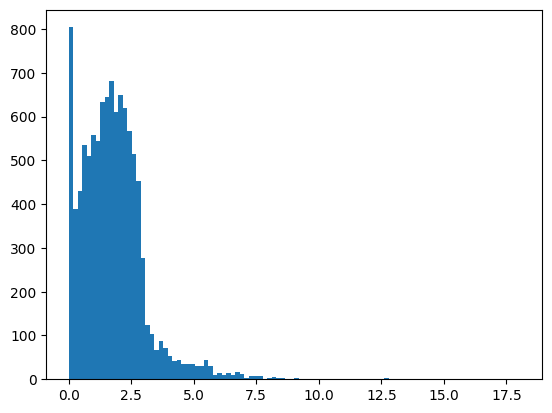

In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
bandgaps = data['Band_gap_GGA'].tolist()

plt.hist(data['Band_gap_GGA'], bins=100)
print("Mean", np.mean(bandgaps), "Std", np.std(bandgaps))
# plt.show()